In [14]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Startup_funding_2025.csv")


df.head()


,Company,Sector,Headquarters,Amount,Funding_Round_Type,Lead_Investors
0,Unicommerce,SaaS,New Delhi,Rs 124.5 crore,-,Anchor investors
1,Banana Club,Consumer > Fashion Tech,Karnataka,$1.39M,Seed,-
2,Neulife,HealthTech > Fitness & Wellness Tech,Maharashtra,$1M,Unattributed,Subhkam Ventures
3,Dhobi G,Consumer > Local Services,Tamil Nadu,$171K,Conventional Debt,Indian Overseas Bank
4,Helex,Life Sciences > Genomics,Telangana,Undisclosed,Seed,Bluehill Capital Trust


In [15]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             887 non-null    object
 1   Sector              886 non-null    object
 2   Headquarters        887 non-null    object
 3   Amount              887 non-null    object
 4   Funding_Round_Type  887 non-null    object
 5   Lead_Investors      887 non-null    object
dtypes: object(6)
memory usage: 41.7+ KB


Index(['Company', 'Sector', 'Headquarters', 'Amount', 'Funding_Round_Type',
       'Lead_Investors'],
      dtype='object')

In [16]:

df.isnull().sum()

,0
Company,0
Sector,1
Headquarters,0
Amount,0
Funding_Round_Type,0
Lead_Investors,0


In [17]:
df['Sector'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1606511320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sector'].fillna('Unknown', inplace=True)


In [18]:
import numpy as np
import re # Import the regular expression module

def convert_amount(x):
    x = str(x)
    if 'Undisclosed' in x or x.strip() == '-':
        return np.nan

    # Remove common currency symbols, commas, and parenthetical expressions first
    x = x.replace(',', '').replace('₹', '').replace('Rs', '').replace('$', '').strip()
    x = re.sub(r'\s*\(~.*\)', '', x).strip()

    # Convert to lowercase for consistent unit checking and replacement
    x_lower = x.lower()

    if 'crore' in x_lower or 'cr' in x_lower:
        # Using regex to extract numbers and then multiply
        match = re.match(r'(\d+\.?\d*)\s*(crore|cr)', x_lower)
        if match:
            val = float(match.group(1))
            return val * 12000000  # approx ₹1 crore = $12M INR/USD adjust
        else:
            return np.nan # Couldn't parse crore amount

    if 'million' in x_lower or 'm' in x_lower:
        # Use regex to extract the number and remove the unit
        match = re.match(r'(\d+\.?\d*)\s*(million|mn|m)', x_lower)
        if match:
            val = float(match.group(1))
            return val * 1_000_000
        else:
            return np.nan # Couldn't parse million amount

    if 'k' in x_lower:
        # Extract number before 'K' case-insensitively
        match = re.match(r'(\d+\.?\d*)\s*k', x_lower)
        if match:
            val = float(match.group(1))
            return val * 1000
        else:
            return np.nan # Couldn't parse K amount

    try:
        # If no units found, try converting directly
        return float(x)
    except:
        return np.nan

df['Amount_USD'] = df['Amount'].apply(convert_amount)


In [19]:
df['Amount_USD'].describe()


,Amount_USD
count,7.910000e+02
mean,2.047771e+08
std,8.470736e+08
min,1.130000e+04
25%,1.760000e+06
50%,6.000000e+06
75%,3.600000e+07
max,8.400000e+09


/tmp/ipython-input-1098090568.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')


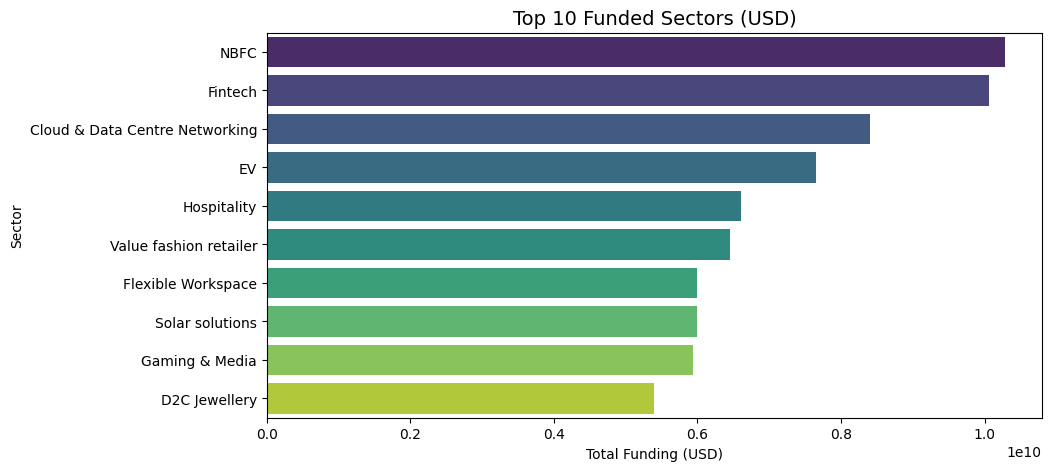

/tmp/ipython-input-1098090568.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')


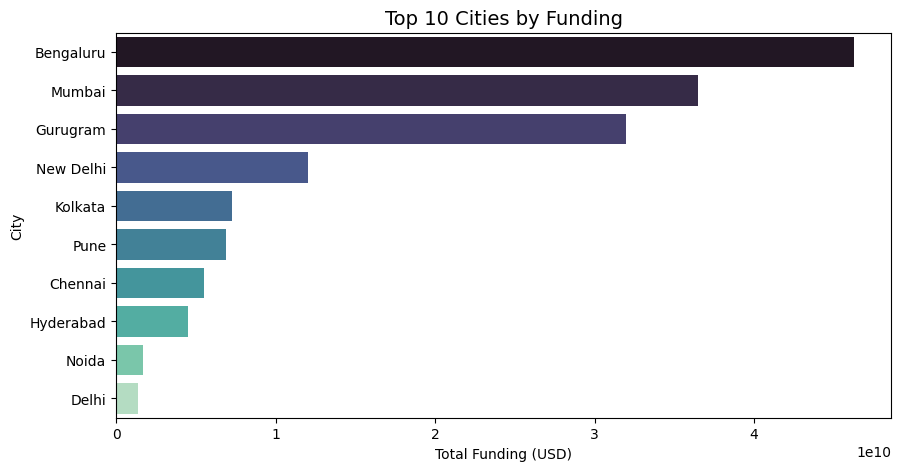

/tmp/ipython-input-1098090568.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rounds.values, y=rounds.index, palette='cool')


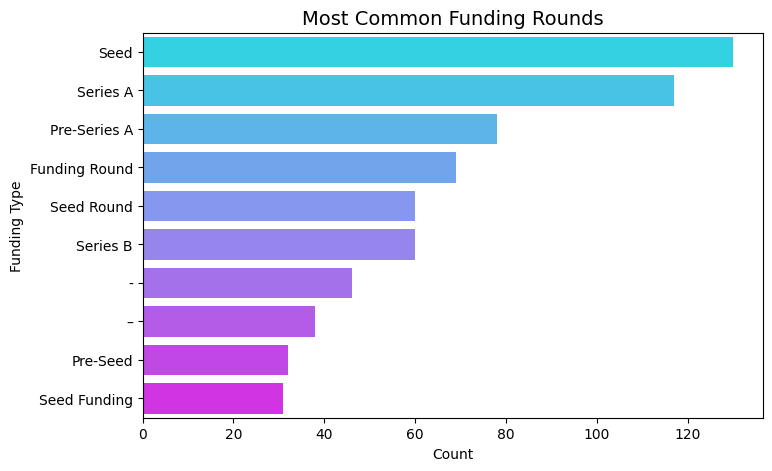

/tmp/ipython-input-1098090568.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette='rocket')


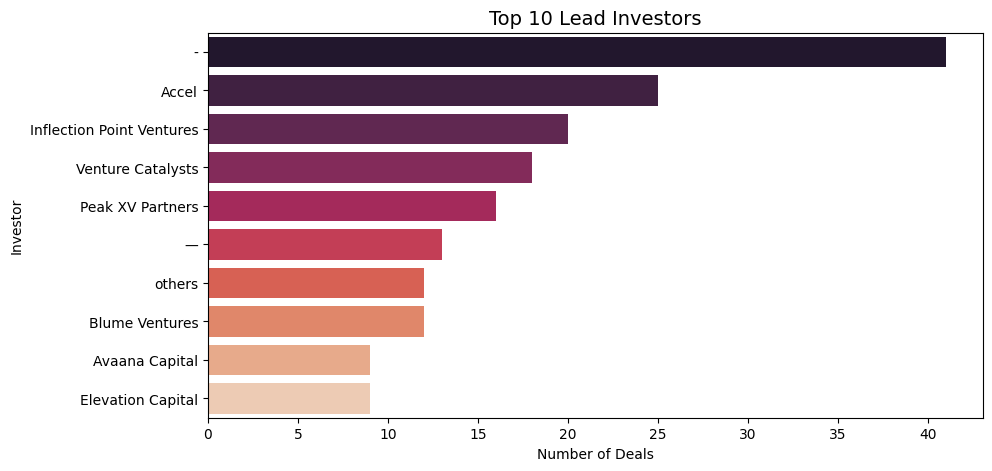

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_sectors = df.groupby('Sector')['Amount_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')
plt.title("Top 10 Funded Sectors (USD)", fontsize=14)
plt.xlabel("Total Funding (USD)")
plt.ylabel("Sector")
plt.show()

top_cities = df.groupby('Headquarters')['Amount_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')
plt.title("Top 10 Cities by Funding", fontsize=14)
plt.xlabel("Total Funding (USD)")
plt.ylabel("City")
plt.show()


rounds = df['Funding_Round_Type'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=rounds.values, y=rounds.index, palette='cool')
plt.title("Most Common Funding Rounds", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Funding Type")
plt.show()

investors = df['Lead_Investors'].dropna().str.split(',').explode().str.strip()
top_investors = investors.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_investors.values, y=top_investors.index, palette='rocket')
plt.title("Top 10 Lead Investors", fontsize=14)
plt.xlabel("Number of Deals")
plt.ylabel("Investor")
plt.show()


In [25]:
df.to_csv("clean_startup_funding_ready.csv", index=False)
print("✅ Clean data saved for Power BI Dashboard")


✅ Clean data saved for Power BI Dashboard
